## Main Project - NYC Property Sales Data Analysis

#### Project Details 

* Project Domain: Business Analytics 
* Dataset: NYC Property Sales (Real Estate Business Data)
* Shape of Data: 84548 x 22 (84548 Rows, 22 Columns)


#### Problem Statement
The dataset under consideration is NYC (New York City) Property Sales Data which is a Real Estate Business data. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

As part of the project, predictive modelling can be performed on the dataset after proper implementation of Data Wrangling, Exploratory Data Analysis and other pre-processing and Data Aggregation approaches. An integral analysis of the dataset will be done to discover New York City’s real estate by looking at a year's worth of raw transaction records. 

##### The predictive analytics is expected to spot trends in the market which aids to build a Regression Model that predicts sales value in the future.

#### Importing Dependancies and Relevant Libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  

#### Loading the Property Sales Dataset

In [193]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [194]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [195]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


### 1. Data Understanding with Primary Pre-processing

Even before we begin to transform the data, we need to understand it.

This phase involves the following steps that entails the objectives for comprehending the dataset under consideration:
1. Primarily, it is always important and recommended to understand the key principles of the Domain ('Real Estate').
2. Understanding the attributes of the data.
3. Summarizing the data by identifying key characteristics, such as data volume and total number of variables in the data.
4. Understanding the problems with the data, such as missing values, inaccuracies, and outliers.

#### 1.1 Understanding the Domain 

**What is Real Estate?**<br>
Real estate is the land along with any permanent improvements attached to the land, whether natural or man-made—including water, trees, minerals, buildings, homes, fences, and bridges. Real estate is a form of real property. It differs from personal property, which are things not permanently attached to the land, such as vehicles, boats, jewelry, furniture, and farm equipment.

<br>

**Economic Characteristics of Real Estate**<br>

Land also has some distinct economic characteristics that influence its value as an investment:

* Scarcity: While land isn't considered rare, the total supply is fixed.
* Improvements: Any additions or changes to the land or a building that affects the property's value is called an improvement. Improvements of a private nature (such as homes and fences) are referred to as improvements on the land. Improvements of a public nature (e.g., sidewalks and sewer systems) are called improvements to the land.
* Permanence of investment: Once land is improved, the total capital and labor used to build the improvement represent a sizable fixed investment. Even though a building can be razed, improvements like drainage, electricity, water, and sewer systems tend to be permanent because they can't be removed (or replaced) economically.
* Location or area preference. Location refers to people's choices and tastes regarding a given area, based on factors like convenience, reputation, and history. Location is one of the most important economic characteristics of land (thus the saying, "location, location, location!").

<br> 
**NYC Property Sales Data**<br>
* The NYC (New York City) property sales dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.
* An integral analysis of the dataset will be done to discover New York City’s real estate by looking at a year's worth of raw transaction records. The predictive analytics is expected to spot trends in the market which aids to build a regression model that predicts sales value in the future.
* This dataset is a concatenated and slightly cleaned-up version of the New York City Department of Finance's Rolling Sales dataset.


#### 1.2 Understanding the Data Attributes 

**What are Attributes of a data?**<br>
* An attribute is a characteristic or feature that is measured for each observation (record) and can vary from one observation to another. 
* It might measured in continuous values or discrete, or in categorical values.

**Attributes in NYC Property Sales Data**
* The NYC Property Sales has 22 Attributes before cleaning.

In [196]:
#code snippet to enlist all the relevant attributes 
count = 0
for i in df.columns:
    print("{}.{}".format(count+1,i))
    count +=1

1.Unnamed: 0
2.BOROUGH
3.NEIGHBORHOOD
4.BUILDING CLASS CATEGORY
5.TAX CLASS AT PRESENT
6.BLOCK
7.LOT
8.EASE-MENT
9.BUILDING CLASS AT PRESENT
10.ADDRESS
11.APARTMENT NUMBER
12.ZIP CODE
13.RESIDENTIAL UNITS
14.COMMERCIAL UNITS
15.TOTAL UNITS
16.LAND SQUARE FEET
17.GROSS SQUARE FEET
18.YEAR BUILT
19.TAX CLASS AT TIME OF SALE
20.BUILDING CLASS AT TIME OF SALE
21.SALE PRICE
22.SALE DATE


* This dataset contains the location, address, type, sale price, and sale date of building units sold. 
* Additional reference on the trickier fields:

    * BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
    * BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
    * BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. 

* Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

    * Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
    
    * This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.





**Detailed List of All Attributes**

1. BOROUGH - A borough in some U.S. states is a unit of local government or other administrative division below the level of the state. 
2. NEIGHBORHOOD - Each Borough has several different neighborhoods and each neighborhood is specific to only one Borough.
3. BUILDING CLASS CATEGORY - 50 different kinds of Building Class Categories such as Theaters, Warehouses, Factories, Commercial Condos, Office buildings, Luxury Hotels, etc.
4. TAX CLASS AT PRESENT - Present Tax Class of Property
5. BLOCK - Block in which the Building resides. The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
6. LOT - The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
7. EASE-MENT - An easement in real estate is the right of one party to use the property of another party by paying a fee to the property owner.
8. BUILDING CLASS AT PRESENT - The type of building at the time of collection of data.
9. ADDRESS - Address of the Building / Property
10. APARTMENT NUMBER - Apartment Number of the Building
11. ZIP CODE - Zip Code (US Counterpart of PIN Code)
12. RESIDENTIAL UNITS - Number of Residential Units in the property
13. COMMERCIAL UNITS - Number of Commercial Units in the property
14. TOTAL UNITS - Sum of residential and Commercial units. Definition of “Unit”: one unit is a single enclosed space that can be operated by one owner, if residential then it may hold a family (such as an apartment), and if commercial then 1 unit can be a shop in a building such as a mall.
15. LAND SQUARE FEET - Sq. Feet Area of the Land / Property (Geographical ground area taken by the building.)
16. GROSS SQUARE FEET - Total area and living surface area inside the building. Found by summing area of each usable floor.
17. YEAR BUILT - Year of Construction of the property
18. TAX CLASS AT TIME OF SALE - 11 Different Tax classes. Tax class at the time of collection of data
19. BUILDING CLASS AT TIME OF SALE 
20. SALE PRICE - Price in USD at which Sale was fixed
21. SALE DATE - Date on which Sale took place
22. Unnamed: 0 - It's an irrelevant attribute that connects with sheet index.

#### 1.3 Summarizing the data

In [197]:
#number of rows (records) and columns (features)
df.shape

(84548, 22)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [199]:
#high level summary stats
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [200]:
def unique_checker(data):
    """loops and prints unique values in each column"""
    for col in data.columns:
        print("Unique values in {} feature.".format(col))
        print(data[col].unique(),"\n")
        print("*"*40)

In [201]:



unique_checker(df) #scroll / toggle output to view all outputs

# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Unique values in Unnamed: 0 feature.
[    4     5     6 ... 26737 26738 26739] 

****************************************
Unique values in BOROUGH feature.
[1 2 3 4 5] 

****************************************
Unique values in NEIGHBORHOOD feature.
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BR

In [202]:
def count_checker(data):
    """count of each value under each feature in the data"""
    for col in data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(data[col].value_counts(),"\n")
        print("*"*40)

In [203]:
count_checker(df) #scroll / toggle output to view all outputs
# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Count for each category of values in Unnamed: 0 feature.
2049     5
478      5
350      5
2399     5
4508     5
        ..
25332    1
25591    1
24422    1
26028    1
25278    1
Name: Unnamed: 0, Length: 26736, dtype: int64 

****************************************
Count for each category of values in BOROUGH feature.
4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64 

****************************************
Count for each category of values in NEIGHBORHOOD feature.
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64 

****************************************
Count for each category of values in BUILD

**Findings:**
* The dataset has 22 attributes and 84548 records.
* The newest building for sales is built in 2017.
* 75% of the data has only about 2 units in total (residential and commercial).
* The column 'Unnamed: 0' is concerned with preset indexing of the dataset.
Hence, this can be dropped from further analysis.

#### 1.4 Understanding the problems with the data

In [204]:
#checking for NULLS
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [205]:

df.duplicated().sum()

0

**Findings:**
* Dataset has 22 columns and 84548 records.
* There are non null values in the data on further analysis.
* For further analysis, we replace empty strings with NaN values.
* No records are duplicated.

In [206]:
#replacing empty strings with nan
df.replace(' ',np.nan, inplace=True)

In [207]:
#rechecking for NULLS
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [208]:
#percentage of nulls
print("TAX CLASS AT PRESENT column has {}% null-values.".format(round((738/84548)*100,3)))
print("EASE-MENT column has {}% null-values.".format(round((84548/84548)*100,3)))
print("BUILDING CLASS AT PRESENT column has {}% null-values.".format(round((738/84548)*100,3)))
print("APARTMENT NUMBER column has {}% null-values.".format(round((65496/84548)*100,3)))


TAX CLASS AT PRESENT column has 0.873% null-values.
EASE-MENT column has 100.0% null-values.
BUILDING CLASS AT PRESENT column has 0.873% null-values.
APARTMENT NUMBER column has 77.466% null-values.


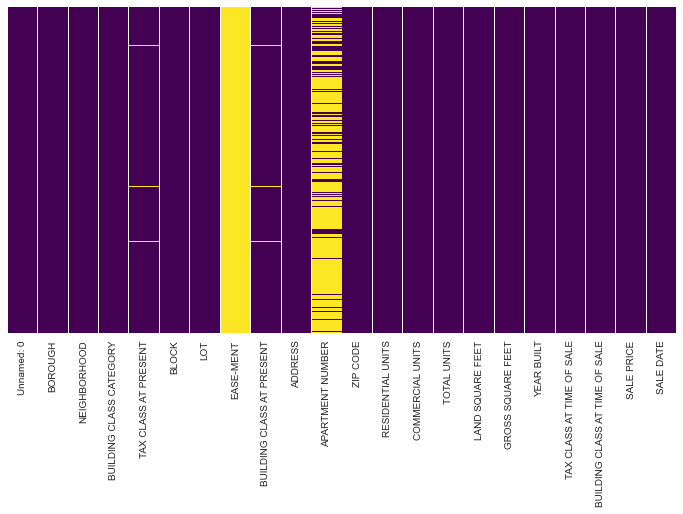

In [209]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.savefig("Missing Values")

* We can completely drop Apartment Number and Easement Attributes as Apartment Number doesn't significantly contribute to our modelling and Easement is full of Nulls.
* For Tax Class and Building Class at present, we replace it with values of Tax and Building Class at time of sale. 

In [210]:
# dropping Apartment Number and Ease-ment
df = df.drop(['EASE-MENT','APARTMENT NUMBER'],axis=1)

In [211]:
# Tax Class at present before filling
df['TAX CLASS AT PRESENT'].isnull().sum()

738

In [212]:
#filling Tax Class values
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT TIME OF SALE'],inplace=True)

In [213]:
# Tax Class at present after filling
df['TAX CLASS AT PRESENT'].isnull().sum()

0

In [214]:
# Building Class at present before filling
df['BUILDING CLASS AT PRESENT'].isnull().sum()

738

In [215]:
#filling Tax Class values
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT TIME OF SALE'],inplace=True)

In [216]:
# Building Class at present after filling
df['BUILDING CLASS AT PRESENT'].isnull().sum()

0

In [217]:
# no more nulls after handling nulls
df.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [218]:
df['Unnamed: 0']

0           4
1           5
2           6
3           7
4           8
         ... 
84543    8409
84544    8410
84545    8411
84546    8412
84547    8413
Name: Unnamed: 0, Length: 84548, dtype: int64

In [219]:
#copying the old df to original_df before dropping
original_df = df

**Findings:**
* The column 'Unnamed: 0' is concerned with preset indexing of the dataset. 
* Hence, this can be dropped from further analysis.

In [220]:
# dropping 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [221]:
df.shape  #one feature has been dropped

(84548, 19)

### 2. Exploratory Data Analysis

In [222]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


* Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies, and to check assumptions with the help of summary statistics and graphical representations.
* We carry out Univariate and Bi-variate Analysis.

### 2.1 Preliminary Analysis

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   ZIP CODE                        84548 non-null  int64 
 9   RESIDENTIAL UNITS               84548 non-null  int64 
 10  COMMERCIAL UNITS                84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

#### Fixing variable dtypes for each feature

In [224]:
# Identifying object columns
print(df.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE',
       'SALE DATE'],
      dtype='object')


In [225]:
# Identifying numerical columns
print(df.select_dtypes(['number']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


**Findings:**
* On analysis and comparing the entried with dtypes, we see that features 'LAND SQUARE FEET', 'GROSS SQUARE FEET','TAX CLASS AT TIME OF SALE', 'SALE PRICE', and 'SALE DATE' has incorrect datatypes. Let's first go fixing this.

In [226]:
# Specifying date variable and correcting its type
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce') 

In [227]:
# Specifying numeric variables and correcting their types
numeric = ["LAND SQUARE FEET" ,"GROSS SQUARE FEET","SALE PRICE" ]
for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [228]:
#  Specifying object type to Tax Class at time of Sale
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('object')

In [229]:
# Splitting SALE DATE for further features
from datetime import datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['sale_month']= df['SALE DATE'].dt.month_name()
df['sale_year']= df['SALE DATE'].dt.year

In [230]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_month,sale_year
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,July,2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,December,2016


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

* We created two extra features from Sales Date which gives the month and year of Sales.
* This data will help us for drill-down analysis.

In [232]:
# checking the summary stats after all the changes
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,sale_year
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,6.998700e+04,84548.000000
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.276456e+06,2016.651169
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,1.140526e+07,0.476603
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016.000000
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,2.250000e+05,2016.000000
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,5.300000e+05,2017.000000
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,9.500000e+05,2017.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,2017.000000


**Findings:**
* Number of Residential unit usually falls between 0 to 2 for about 75% of the properties. The max residential units sums upto 1844 units.
* Number of Commercial Units for most of the properties are 0, which is the usual scenario. 
* The max number of commercial units for a building is 2261 units.
* Considering the year of building, aroudn 75% are built on or before 1965.
* 1276456.0 USD is found as the mean of Sales Prices. Max sale price hits upto 2210000000.0 USD while few buildings seem to have been sold at 0 USD (a free of cost deal may be!)

#### Renaming columns in lower_case format for ease of working

In [233]:
df.columns = df.columns.str.lower() #converting names to lower case

In [234]:


df.columns = df.columns.str.replace(' ', '_') #replaces spaces with underscore

In [235]:
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'sale_month', 'sale_year'],
      dtype='object')

In [236]:

df.head(2)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_month,sale_year
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,July,2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,December,2016


### 2.2 Visual Analysis

#### 2.2.1 Univariate Analysis

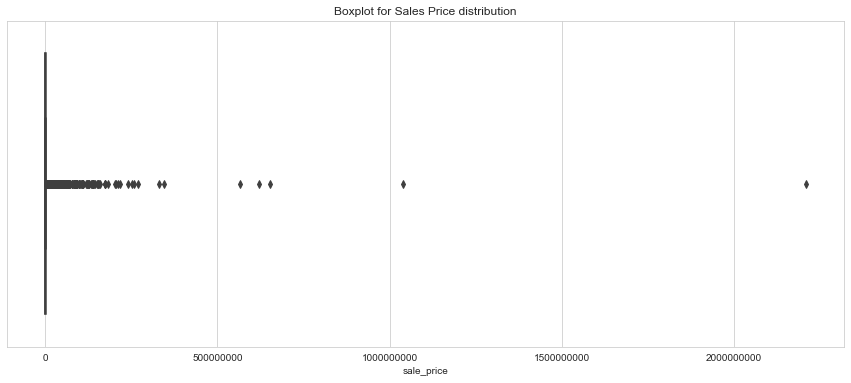

<Figure size 432x288 with 0 Axes>

In [237]:
# 
plt.figure(figsize=(15,6))

sns.boxplot(x='sale_price', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot for Sales Price distribution')
plt.show()
plt.savefig('Boxplot for Sales Price distribution.png')

**Insights:**
* From the box plot distribution of datapoints, we can identify that majority of the Sales were dealt within a price range very less than 500000000 USD. 
* There are a handful of big shot sales that affect the distribution, posing as grumpy outliers.

In [238]:
sales_range = df[(df['sale_price']>10000) & (df['sale_price']<10000000)]

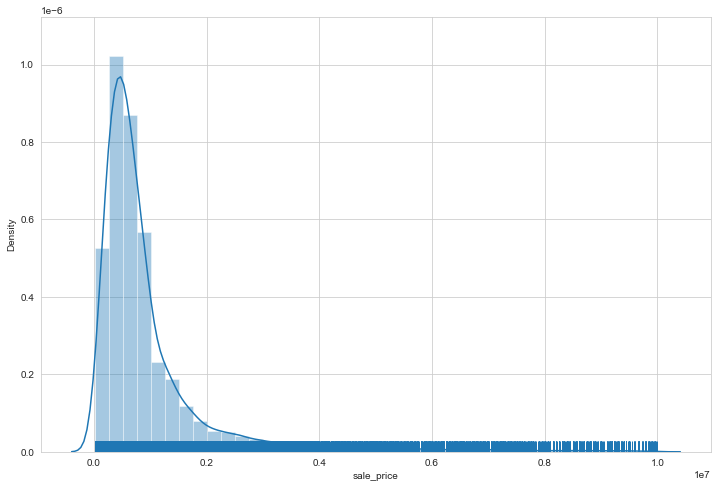

<Figure size 432x288 with 0 Axes>

In [239]:
plt.figure(figsize=(12,8))
sns.distplot(sales_range['sale_price'], kde=True,rug=True, bins=40)
plt.show()
plt.savefig('sale Price.png')

**Insights:**
* There are more sales happening towards the low to moderate price range. 
* The density is larger in this region.
* Number of sales happening in the higher price spectrum is lesser but they add more weightage to the sale price in total.

In [240]:
borough_df = df

In [241]:
# Setting categories of borough with place names  
borough_df['borough'] = borough_df['borough'].astype(str)
borough_df['borough'] = borough_df['borough'].str.replace("1", "Manhattan")
borough_df['borough'] = borough_df['borough'].str.replace("2", "Bronx")
borough_df['borough'] = borough_df['borough'].str.replace("3", "Brooklyn")
borough_df['borough'] = borough_df['borough'].str.replace("4", "Queens")
borough_df['borough'] = borough_df['borough'].str.replace("5", "Staten Island")

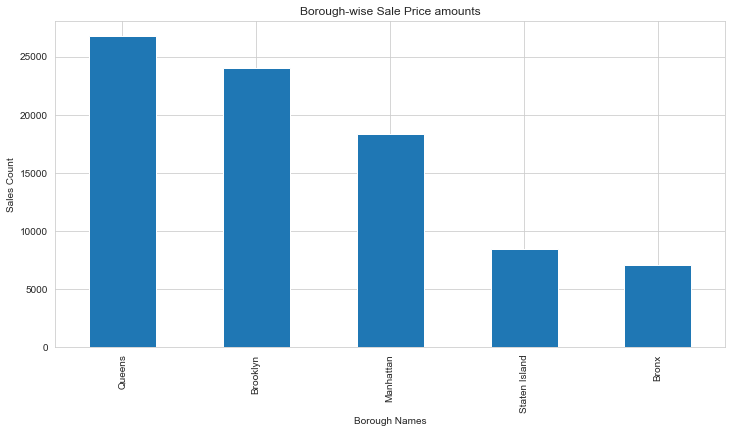

In [242]:
# plot depicting Sales Price wrt Boroughs
plt.figure(figsize=(12,6))
borough_df['borough'].value_counts().plot.bar()
plt.title("Borough-wise Sale Price amounts")
plt.xlabel('Borough Names')
plt.ylabel('Sales Count')
plt.savefig('Borough-wise Sale Price amounts')

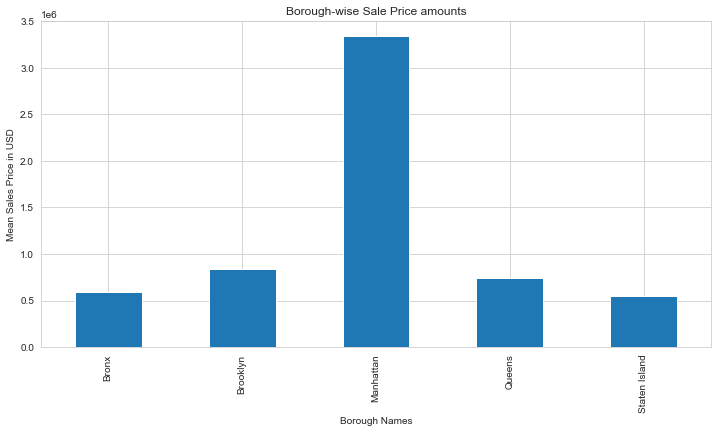

In [243]:















# plot depicting Average Sales Price (Mean) wrt Boroughs
plt.figure(figsize=(12,6))
borough_df['sale_price'].groupby(borough_df['borough']).mean().plot.bar()
plt.title("Borough-wise Sale Price amounts")
plt.xlabel('Borough Names')
plt.ylabel('Mean Sales Price in USD')
plt.savefig('Borough-wise Sale Price amounts.png')

**Insights:**
* Considering the Count of Sales, Manhattan is 3rd and Queens is the first and Brooklyn the second.
* Both Queens and Brooklyn together generate less than half of the average sales that Manhattan has.
* Manhattan has the highest Average Sales price among the Borough's whereas Staten Island and Bronx has lowest.
* Manhattan is one of the most richest regions in US. This might be the reason for the high sales price average even with lesser number of sales happening.


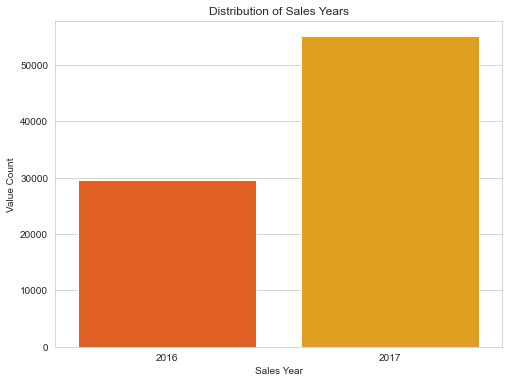

<Figure size 432x288 with 0 Axes>

In [244]:
#Count of Class Labels - CountPlot

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(x='sale_year', data=df, palette='autumn')
plt.title("Distribution of Sales Years")
plt.xlabel("Sales Year")
plt.ylabel("Value Count")
plt.show()
plt.savefig('Distribution of Sales Years.png')

In [245]:
df["sale_year"].value_counts(normalize=True).to_frame()

,sale_year
2017,0.651169
2016,0.348831


**Insights:**
* Almost 2/3 of all the Sales occured in 2017.

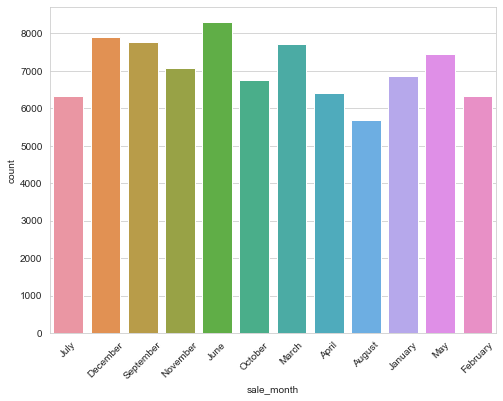

In [246]:
# Sales count wise comparison of Sale Months
plt.figure(figsize=(8,6))
sns.countplot(df['sale_month'])
plt.xticks(rotation=45)
plt.savefig('sale_month.png')

**Insights:**
* We see that August has the least number of sales next to July.
* Months like June, December and March has high property sales.

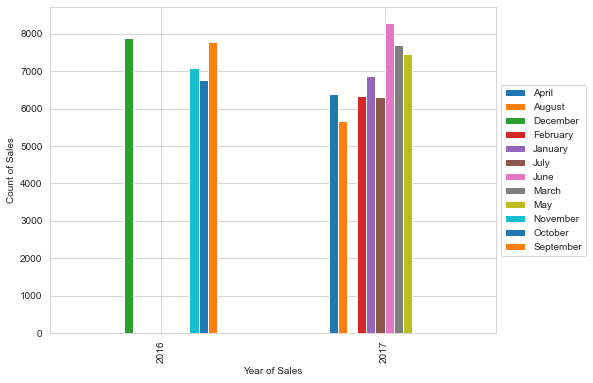

<Figure size 432x288 with 0 Axes>

In [247]:
df.groupby('sale_year')['sale_month'].value_counts().unstack().plot.bar(figsize=(8,6))
plt.xlabel("Year of Sales")
plt.ylabel("Count of Sales")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.savefig('Year of Sales.png')

**Insights:**
* It was already analysed that 2016 has lesser number of sales compared to 2017.
* Here, we get a more clearer picture with the number of months that had active deals in both the years.
* It can be seen that for 2016, sales took place only in 4 months whereas 2017 had 8 active months of sales.

<AxesSubplot:>

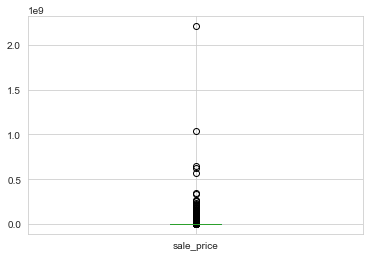

In [248]:
df.boxplot(column=['sale_price'])

<AxesSubplot:>

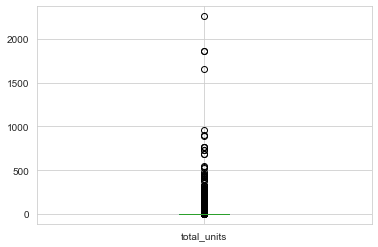

In [249]:
df.boxplot(column=['total_units'])

<AxesSubplot:>

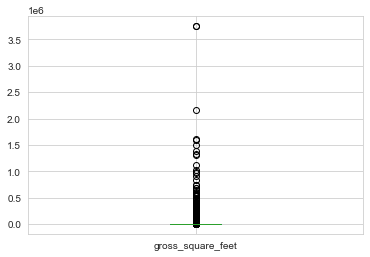

In [250]:
df.boxplot(column=['gross_square_feet'])

**Insights:**
* All the major aspects that contribute to the sales prices has major outliers.
* This impact have  to be dealt with while further pre-processing

#### 2.2.1 Bivariate and Multivariate Analysis

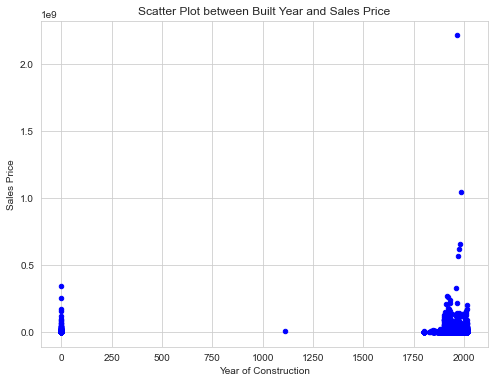

<Figure size 432x288 with 0 Axes>

In [251]:
df.plot(kind='scatter', x='year_built', y='sale_price',color='blue',figsize=(8,6))
plt.title("Scatter Plot between Built Year and Sales Price")
plt.xlabel("Year of Construction")
plt.ylabel("Sales Price")
plt.show()
plt.savefig('Scatter Plot between Built Year and Sales Price.png')

In [252]:
df[df['year_built']!=0]['year_built'].value_counts()

1920    6045
1930    5043
1925    4312
1910    3585
1950    3156
        ... 
1680       1
1111       1
1832       1
1888       1
1855       1
Name: year_built, Length: 157, dtype: int64

**Insights:**
* There are quite a few buildings who has year_built given as zero. This may be because the exact year of construction may be unknown or unrevealed.
* Most of the buildings fall in the range between 1750 to 2007. 2007 is the newest as per our earlier analysis.
* Majority of the buildings in 1920 may be they have a good building structures!!

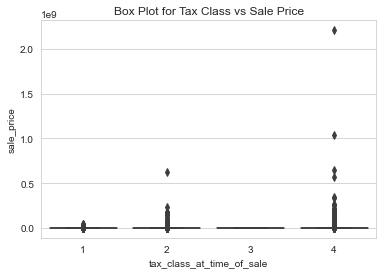

<Figure size 432x288 with 0 Axes>

In [253]:
sns.boxplot(x='tax_class_at_time_of_sale', y='sale_price', data=df)
plt.title('Box Plot for Tax Class vs Sale Price')

plt.show()
plt.savefig('Box Plot for Tax Class vs Sale Price.png')

**Insights:**
* Sales price is particularly high for buildings having 2nd and 4th Tax Class.

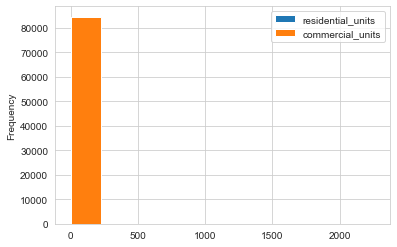

In [254]:
df[['residential_units','commercial_units']].plot.hist()
plt.show()

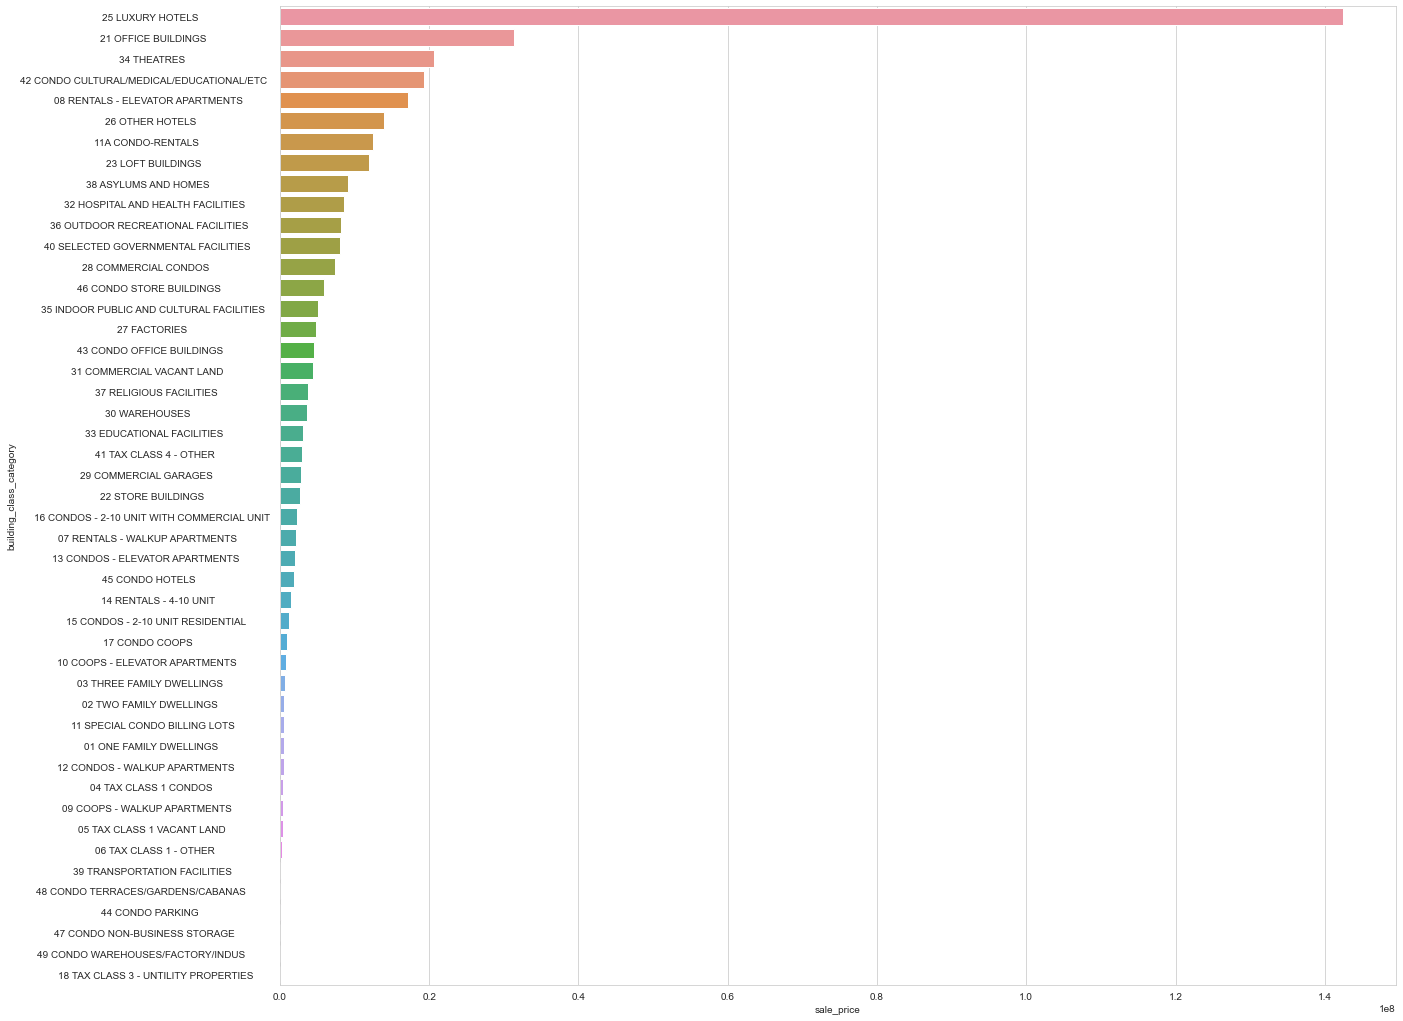

In [255]:
# Building Category-wise Sale Price

categ = df[["building_class_category", "sale_price"]].groupby(['building_class_category'], as_index=False).mean().sort_values(by='sale_price', ascending=False)
plt.figure(figsize=(20,18))

sns.barplot(x='sale_price', y='building_class_category', data=categ, orient = 'h')
plt.savefig('building class and sale price.png')

**Insights:**
* It can be clearly seen that the commercial units like Luxury Hotel and Office Builings are sold at greatest prices.
* Warehouses and Utility properties, One family dwelling apartments, etc. are the cheapest sold building categories.

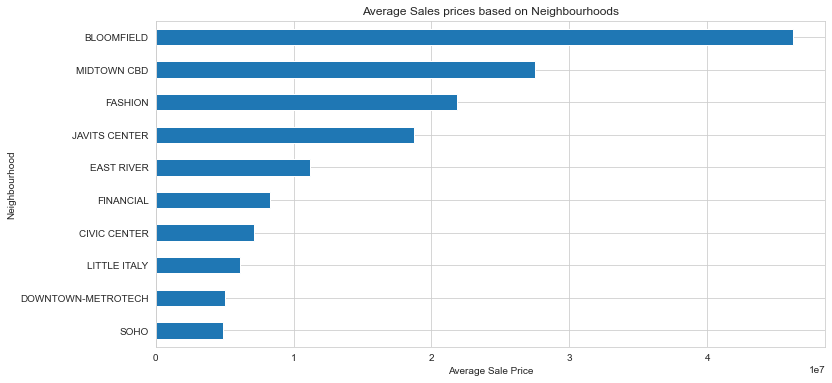

In [256]:
plt.figure(figsize=(12,6))
# top ten items picked based on sorted values of average sales prices wrt neighbourhood
df['sale_price'].groupby(df['neighborhood']).mean().sort_values()[244:254].plot.barh()
plt.title('Average Sales prices based on Neighbourhoods')
plt.xlabel("Average Sale Price")
plt.ylabel('Neighbourhood')
plt.savefig('Average Sales prices based on Neighbourhoods.png')

**Insights:**
* Bloomfield neighbourhood projects the richest average sales records whereas Soho and Downtown-Metrotech has the least average sales price.
* Neighbourhood is another strong impact in sales price.

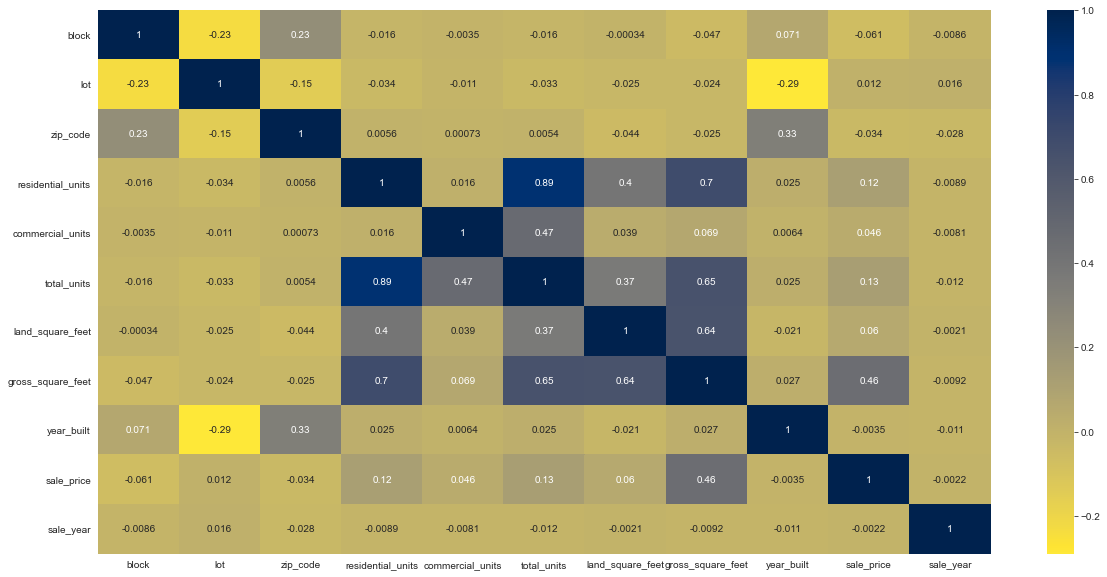

<Figure size 432x288 with 0 Axes>

In [257]:
#Heatmap for Correlation of the Features 
# This is a multi-variate heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='cividis_r')
plt.show()
plt.savefig('corre.png')

**Insights:**
* Sale Price has fairly strong correlation with Gross Square Feet (Area of the building) 
* Apparently, Year Built (Age of the house) seem to not have a big negative correlation with the Sale Price as expected.

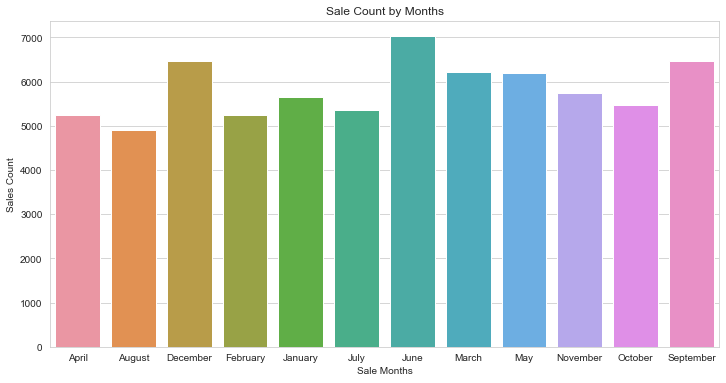

<Figure size 432x288 with 0 Axes>

In [258]:
df_month = df[['sale_month', 'sale_price']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_month.columns.values[1]='Sales Count'

plt.figure(figsize=(12,6))
sns.barplot(y = 'Sales Count', x = 'sale_month', data = df_month)
plt.xlabel('Sale Months')
plt.title('Sale Count by Months')
plt.show()
plt.savefig('Sale Count by Months.png')

**Insights:**
* We see that August has the least number of sales next to July.
* Months like June, December and March has high property sales.

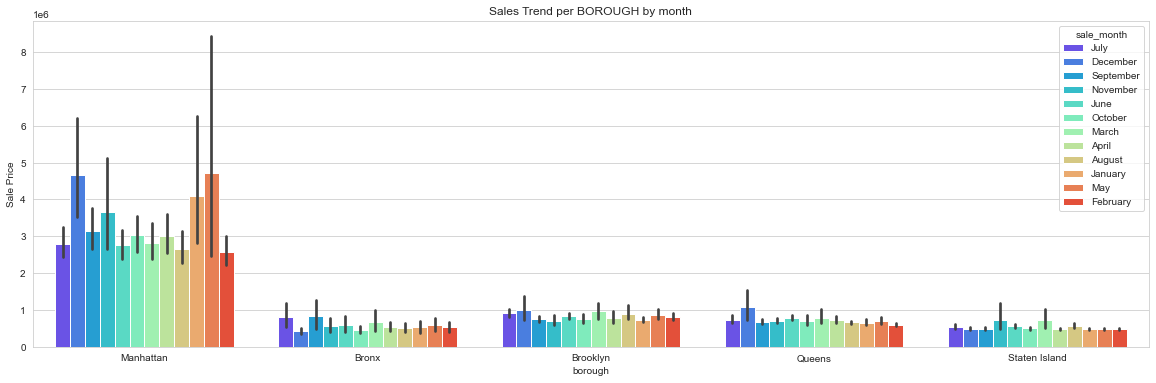

<Figure size 432x288 with 0 Axes>

In [259]:
plt.figure(figsize=(20,6))
sns.barplot(x='borough', y='sale_price', hue='sale_month', data=df, palette='rainbow');
plt.title('Sales Trend per BOROUGH by month')
plt.ylabel('Sale Price')
plt.show()
plt.savefig("Sales Trend per BOROUGH by month.png")

**Insights:**
    
- May and December are the largest sales month in Manhattan in both years 2016 and 2017
- February is the smallest sales month in Manhattan in both years 2016 and 2017
- December is the smallest sales month in Bronx in both years 2016 and 2017

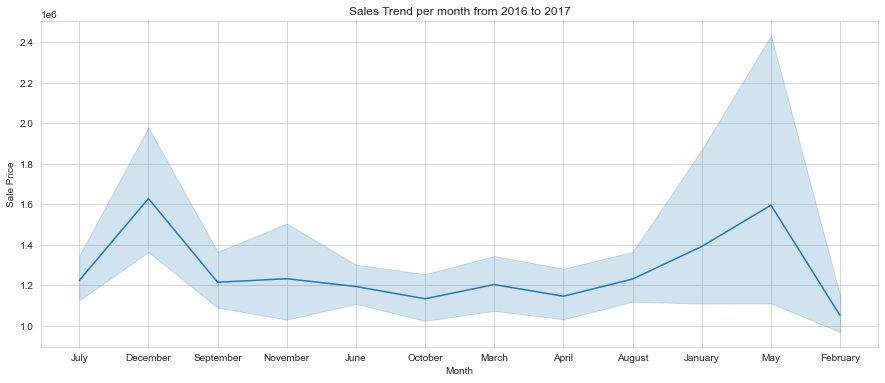

<Figure size 432x288 with 0 Axes>

In [260]:
plt.figure(figsize=(15,6))
sns.lineplot(x='sale_month',y='sale_price',data=df)
plt.title('Sales Trend per month from 2016 to 2017')
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show()
plt.savefig('Sales Trend per month from 2016 to 2017.png')

**Insights:**
* December to May shows an increase in sales for 2017.
* Sales was the highest in December in 2016.

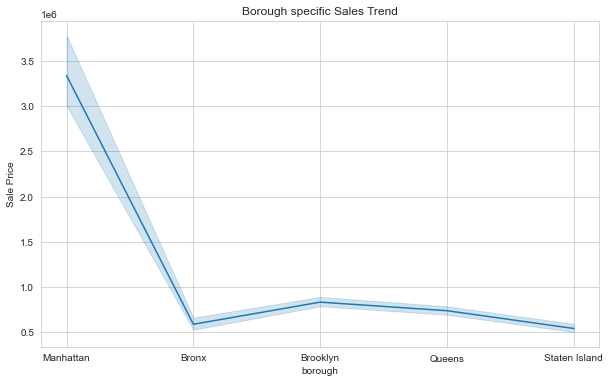

<Figure size 432x288 with 0 Axes>

In [261]:
plt.figure(figsize=(10,6))
sns.lineplot(x='borough',y='sale_price',data=df)
plt.title('Borough specific Sales Trend')
plt.ylabel('Sale Price')
plt.show()
plt.savefig('Borough specific Sales Trend.png')

**Insights:**
* Considering the Count of Sales, Manhattan is 3rd and Queens is the first and Brooklyn the second.
* Both Queens and Brooklyn together generate less than half of the average sales that Manhattan has.
* we need to work on marketing for property's in queens and Bronz cause they are have the lowest sales of all
* Manhattan has the highest Average Sales price among the Borough's whereas Staten Island and Bronx has lowest.
* Manhattan is one of the most richest regions in US. This might be the reason for the high sales price average even with lesser number of sales happening.

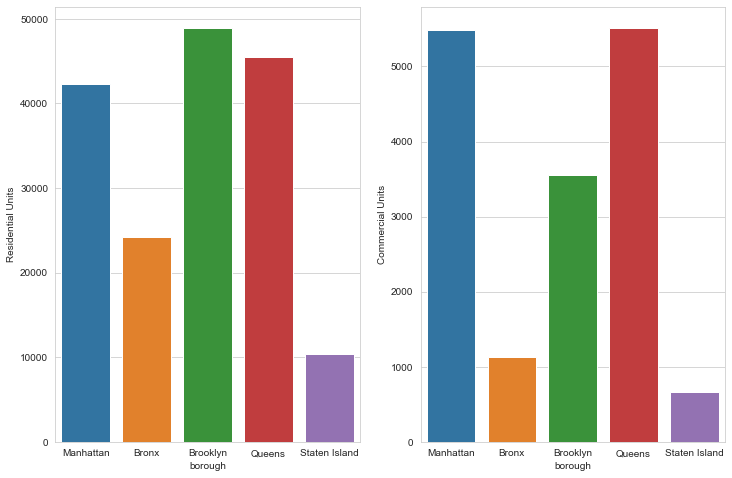

In [262]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)

sns.barplot(x="borough", y="residential_units", data=df, estimator=sum, ci=None)
plt.ylabel('Residential Units')

plt.subplot(1, 2, 2)

sns.barplot(x="borough", y="commercial_units", data=df, estimator=sum, ci=None)
plt.ylabel('Commercial Units');
plt.savefig('resi unit and commericial unit.png')

**Insights:**
* Broklyn, Brinx and Staten Island has higher number of Residential Units than Commerical Units.
* Manhattan and Queens has the maximum number of Commercial Units. 
* Manhattan and Queens also has a lot of Residential Units as well.

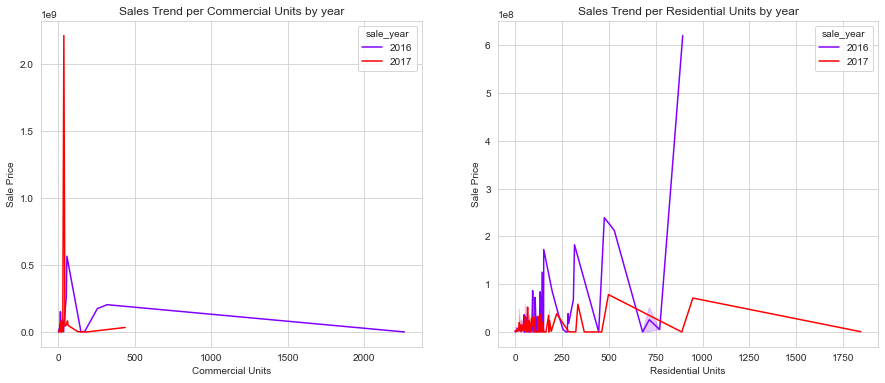

In [263]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Sales Trend per Commercial Units by year')
sns.lineplot(x="commercial_units",y="sale_price",hue='sale_year',data=df, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Commercial Units')

plt.subplot(1, 2, 2)
plt.title('Sales Trend per Residential Units by year')
sns.lineplot(x="residential_units",y="sale_price",hue='sale_year',data=df, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Residential Units');
plt.savefig("Sales Trend per Commercial Units and residential_units by year.png")




**Insights:** 
- This explain how Residential units makes more sales in 2016 than 2017
- Most property's revenue come from Residential units .

**EDA wise Comprehension of the NYC Data:**
* From the analysis, we see that there is a major impact of the Borough category on the Sales Price and Sales Trends.
* The number of Residential and Commercial Units impact the Sales Price as well as the Average Sales Price.
* Commercial Units are lesser in number but contribute significantly to the price.
* Factors like Neighbourhood, Tax Class and Building Class Category also impact the sales price.

### 3. Data Pre-processing

* Data preprocessing in Machine Learning is a crucial step that helps enhance the quality of data to promote the extraction of meaningful insights from the data. 
* Technique are employed for preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

In [264]:
#Checking for duplicated entries
sum(df.duplicated(df.columns))

765

In [265]:
#Delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [266]:
#create a new column for age of the unit
df['age'] = 2017- df['year_built']

#### 3.1 Handling Missing Values

In [267]:
df.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
building_class_at_present             0
address                               0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26054
gross_square_feet                 27385
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14176
sale_date                             0
sale_month                            0
sale_year                             0
age                                   0
dtype: int64

In [268]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

borough                            0.000000
neighborhood                       0.000000
building_class_category            0.000000
tax_class_at_present               0.000000
block                              0.000000
lot                                0.000000
building_class_at_present          0.000000
address                            0.000000
zip_code                           0.000000
residential_units                  0.000000
commercial_units                   0.000000
total_units                        0.000000
land_square_feet                  31.097001
gross_square_feet                 32.685628
year_built                         0.000000
tax_class_at_time_of_sale          0.000000
building_class_at_time_of_sale     0.000000
sale_price                        16.919900
sale_date                          0.000000
sale_month                         0.000000
sale_year                          0.000000
age                                0.000000
dtype: float64

There are  missing values for the land (31%) and gross square feet (33%) of the housing units. Additionally, sale prices (17%) are missing.

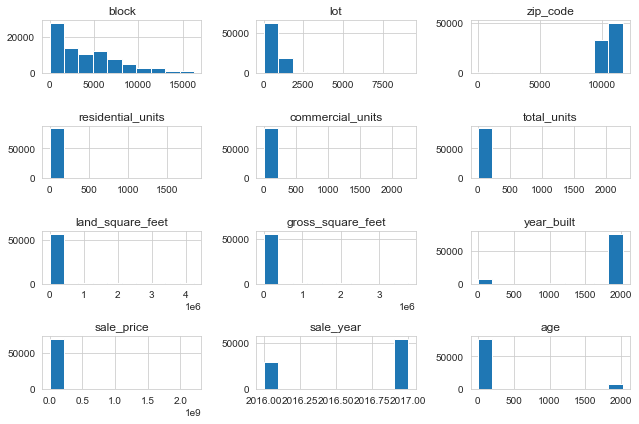

In [269]:
## freq distribution graph
freqgraph=df.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()


In [270]:
df['land_square_feet'] =df['land_square_feet'].fillna(df['land_square_feet'].mean())
df['gross_square_feet'] =df['gross_square_feet'].fillna(df['gross_square_feet'].mean())

In [271]:
df.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
building_class_at_present             0
address                               0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                      0
gross_square_feet                     0
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14176
sale_date                             0
sale_month                            0
sale_year                             0
age                                   0
dtype: int64

In [272]:
#we remove the null values in sale price
df=df.dropna()

In [273]:
df.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
sale_month                        0
sale_year                         0
age                               0
dtype: int64

In [274]:
df.describe()

,block,lot,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,sale_year,age
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,6.960700e+04,6.960700e+04,69607.000000,6.960700e+04,69607.000000,69607.000000
mean,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.638934e+03,3.642753e+03,1799.852184,1.280703e+06,2016.655293,217.147816
std,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.315376e+04,2.422798e+04,520.099311,1.143036e+07,0.475276,520.099311
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016.000000,0.000000
25%,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.266000e+03,1920.000000,2.300000e+05,2016.000000,52.000000
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.945000e+03,2.400000e+03,1938.000000,5.330000e+05,2017.000000,79.000000
75%,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.854481e+03,3.894416e+03,1965.000000,9.500000e+05,2017.000000,97.000000
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,2017.000000,2017.000000


- There are minimum values of zero for columns that do not make sense. For example, year built has a minimum value of 0.

In [275]:
#check dataframe where year_built is 0 years
df[df['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_month,sale_year,age
74,Manhattan,ALPHABET CITY,11A CONDO-RENTALS,2,394,1602,RR,183-189 AVENUE B,0,0,0,0,3854.481179,3894.415813,0,2,RR,8058923.0,2017-08-09,August,2017,2017
76,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,10009,1,0,1,3854.481179,3894.415813,0,2,R2,620000.0,2016-12-30,December,2016,2017
87,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,375,1004,R4,754 EAST 6TH STREET,10009,1,0,1,3854.481179,3894.415813,0,2,R4,875000.0,2017-03-31,March,2017,2017
117,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,390,1009,R4,217 EAST 7TH STREET,10009,1,0,1,3854.481179,3894.415813,0,2,R4,550000.0,2017-06-23,June,2017,2017
118,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,390,1014,R4,217 EAST 7TH STREET,10009,1,0,1,3854.481179,3894.415813,0,2,R4,1085000.0,2017-03-27,March,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84162,Staten Island,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1478,194,V0,VEDDER AVENUE,0,0,0,0,223.000000,3894.415813,0,1,V0,2000.0,2017-04-06,April,2017,2017
84163,Staten Island,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1478,541,V0,WILLOWBROOK ROAD,10302,0,0,0,3971.000000,3894.415813,0,1,V0,90000.0,2017-03-15,March,2017,2017
84166,Staten Island,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1508,140,V0,19 CANTERBURY AVENUE,10314,0,0,0,5000.000000,3894.415813,0,1,V0,400000.0,2017-04-27,April,2017,2017
84167,Staten Island,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1524,22,V0,CAMBRIDGE AVENUE,0,0,0,0,4000.000000,3894.415813,0,1,V0,300000.0,2017-05-05,May,2017,2017


there are 5344 rows/observations where the year_built for the building is 0 years old.

In [276]:
#remove rows where year_built = 0
df = df[df['year_built']!=0]

#### 3.2 Treating Outliers

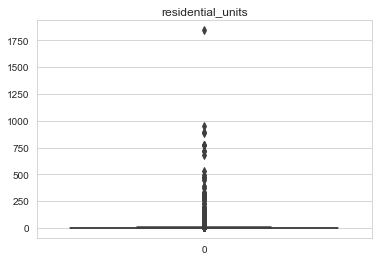

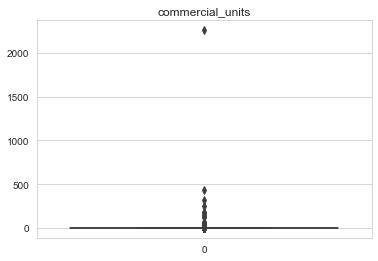

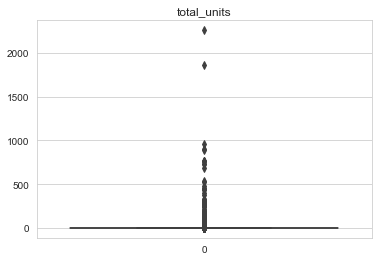

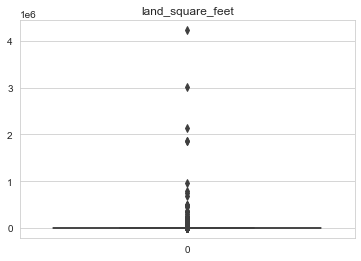

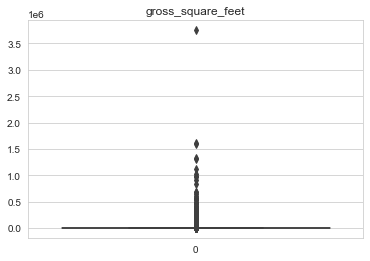

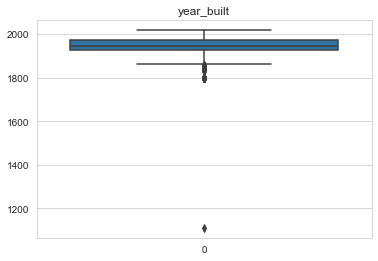

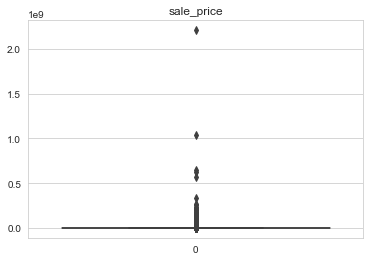

In [277]:
## checking outliers
for i in ['residential_units', 'commercial_units',
       'total_units','land_square_feet','gross_square_feet','year_built','sale_price'] :
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()  


In [278]:
df1=df

In [279]:
df1

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_month,sale_year,age
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,July,2017,117
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,September,2016,104
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,November,2016,117
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,September,2016,97
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,November,2016,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,November,2016,19
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,April,2017,19
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,July,2017,92
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,December,2016,16


##### 3.2.1 Handling Outliers with land_square_feet

In [280]:
q1 = np.percentile(df1['land_square_feet'],25,interpolation='midpoint')
q3 = np.percentile(df1['land_square_feet'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['land_square_feet'][(df1['land_square_feet']<low_limit)|(df1['land_square_feet']>high_limit)].index
df1.drop(index,inplace=True)

##### 3.2.2 Handling Outliers with gross_square_feet

In [281]:
q1 = np.percentile(df1['gross_square_feet'],25,interpolation='midpoint')
q3 = np.percentile(df1['gross_square_feet'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['gross_square_feet'][(df1['gross_square_feet']<low_limit)|(df1['gross_square_feet']>high_limit)].index
df1.drop(index,inplace=True)

##### 3.2.3 Handling Outliers with year_built

In [282]:
#Remove the year_built below the 1800
df1=df[df['year_built'] > 1800]

<AxesSubplot:xlabel='year_built'>

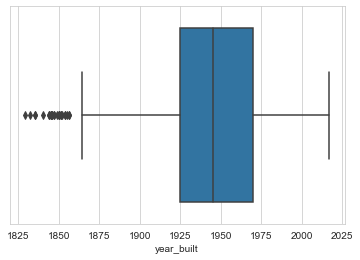

In [283]:
sns.boxplot(x='year_built', data=df1)

##### 3.2.4 Handling Outliers with sale_price

* Note: From the box plot distribution of datapoints, we can identify that majority of the Sales were dealt within a price range very less than 500000000 USD.

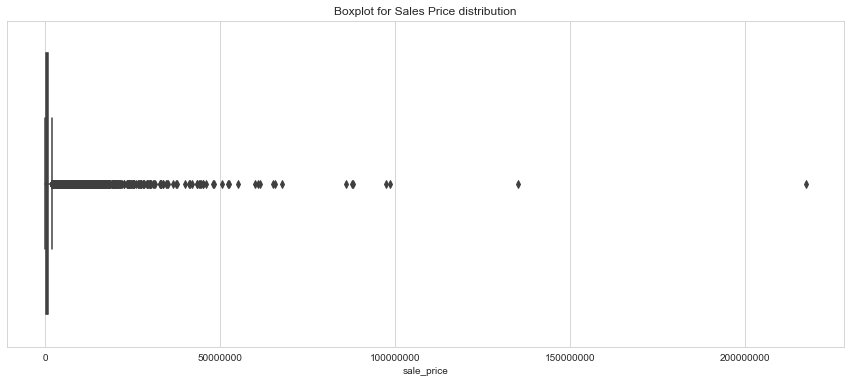

<Figure size 432x288 with 0 Axes>

In [284]:
plt.figure(figsize=(15,6))

sns.boxplot(x='sale_price', data=df1)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot for Sales Price distribution')
plt.show()
plt.savefig('Boxplot for Sales Price distribution.png')

In [285]:
#Lets remove these  outliers for the purposes of this analysis. 
#remove outlier prices
# Remove observations that fall outside those caps
df1 = df1[(df1['sale_price'] > 100000) & (df1['sale_price'] < 5000000)]

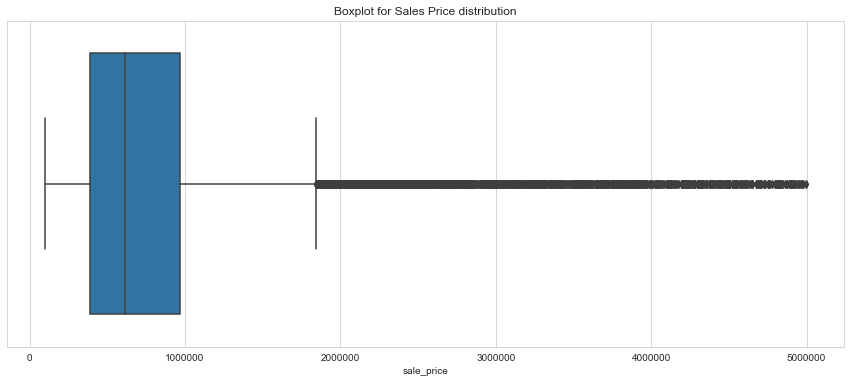

In [286]:
plt.figure(figsize=(15,6))

sns.boxplot(x='sale_price', data=df1)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot for Sales Price distribution')
plt.show()

<AxesSubplot:xlabel='sale_price', ylabel='Density'>

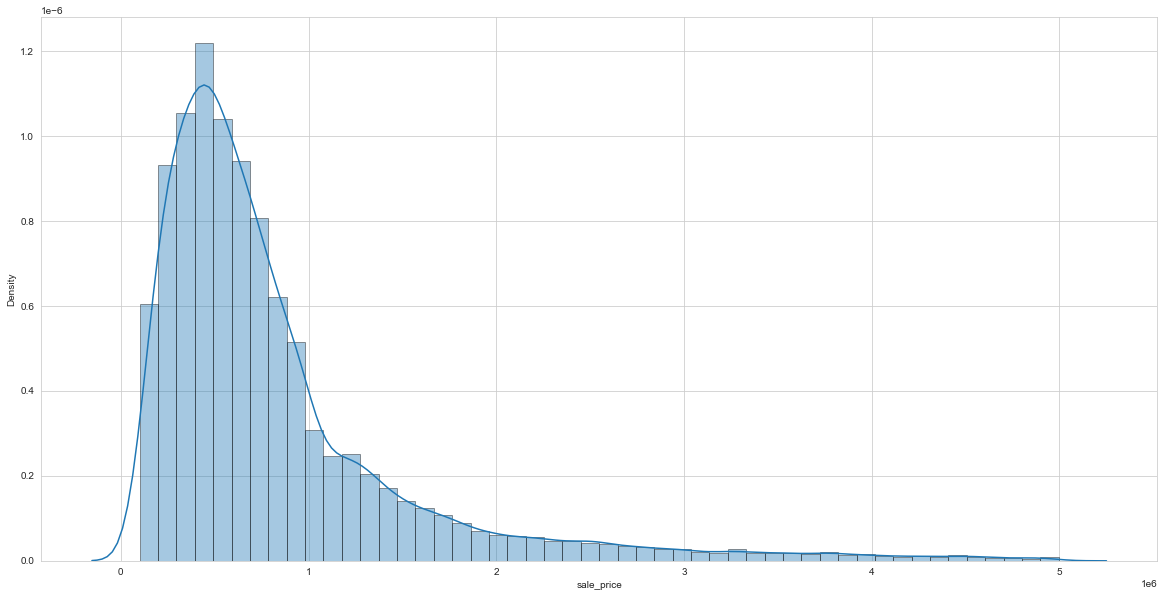

In [287]:
#create distribution plot of property sale prices
plt.figure(figsize = (20,10))
sns.distplot(df1['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

##### 3.2.5 Handling Outliers with total units,residential_units and commercial_units

* Note: Deleting the outliers with 0 total units. Those are only a handful of observations though. In addition, I get rid of the observations the sum of COMMERCIAL UNITS and RESIDENTIAL UNITS doesn't match TOTAL UNITS.

In [288]:
# Only a handful of properties with 0 total units are remaining and they will now be deleted
df1= df1[(df1['total_units'] > 0)] 

In [289]:
#Remove data where commercial + residential doesn't equal total units
df1 = df1[df1['total_units'] == df1['commercial_units'] + df1['residential_units']]

In [290]:
df1.shape

(34859, 22)

In [291]:
df1.describe()

,block,lot,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,sale_year,age
count,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,3.485900e+04,34859.000000,34859.000000
mean,4844.953728,400.364382,10923.083250,1.549844,0.122866,1.672710,2734.058842,2191.018575,1953.176568,8.967241e+05,2016.657420,63.823432
std,3761.907055,638.587671,621.920847,1.040272,12.113960,12.150276,1362.383230,1300.536399,37.420392,7.416761e+05,0.474579,37.420392
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1845.000000,1.007000e+05,2016.000000,0.000000
25%,1641.000000,26.000000,10314.000000,1.000000,0.000000,1.000000,1967.000000,1294.000000,1925.000000,4.550000e+05,2016.000000,29.000000
50%,4217.000000,56.000000,11216.000000,1.000000,0.000000,1.000000,2518.000000,1936.000000,1944.000000,6.700000e+05,2017.000000,73.000000
75%,6979.000000,1007.000000,11363.000000,2.000000,0.000000,2.000000,3854.481179,3319.500000,1988.000000,9.990000e+05,2017.000000,92.000000
max,16319.000000,8160.000000,11694.000000,16.000000,2261.000000,2261.000000,6709.000000,7740.000000,2017.000000,4.996841e+06,2017.000000,172.000000


In [292]:
df1.columns


Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'sale_month', 'sale_year', 'age'],
      dtype='object')

In [293]:
df1.shape

(34859, 22)

### 4. Feature Engineering and Feature Reduction

- **Creating a new column called ‘ Age’ transforming the variable, ‘Year Built’. I did this as  age is a much clearer metric to understand.**
- **Sale Date was converted into a sale_date', 'sale_month', 'sale_year' format**
- **Remove unnecessary  variables for the model**

In [294]:
# Deleting of unnecessary  variables for the model

df1.drop(['block','lot','address','zip_code','building_class_at_time_of_sale','sale_date','building_class_at_present','tax_class_at_time_of_sale'
         ,'sale_month', 'sale_year','tax_class_at_present']
,axis=1,inplace=True)

In [295]:
df1.shape

(34859, 11)

### 5. Encoding Features

In [296]:
df1.columns


Index(['borough', 'neighborhood', 'building_class_category',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price',
       'age'],
      dtype='object')

##### 5.1 One-Hot Encoding

In [297]:
#Select the variables to be one-hot encoded
one_hot_features = ['borough']
df1 = pd.get_dummies(df1, columns=one_hot_features)

In [298]:
df1.head()

,neighborhood,building_class_category,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272.000000,6794.000000,1913,3936272.0,104,0,0,1,0,0
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8,0,8,1750.000000,4226.000000,1920,3192840.0,97,0,0,1,0,0
79,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,3854.481179,3894.415813,1920,762669.0,97,0,0,1,0,0
80,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,3854.481179,3894.415813,1920,772851.0,97,0,0,1,0,0
81,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,3854.481179,3894.415813,1920,1034880.0,97,0,0,1,0,0


##### 5.2 Label Encoding

In [299]:
#label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric 
df1['building_class_category']  = le.fit_transform(df1['building_class_category'])
df1['neighborhood']  = le.fit_transform(df1['neighborhood'])

In [300]:
df1.head()

,neighborhood,building_class_category,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
3,1,6,10,0,10,2272.000000,6794.000000,1913,3936272.0,104,0,0,1,0,0
6,1,6,8,0,8,1750.000000,4226.000000,1920,3192840.0,97,0,0,1,0,0
79,1,10,1,0,1,3854.481179,3894.415813,1920,762669.0,97,0,0,1,0,0
80,1,10,1,0,1,3854.481179,3894.415813,1920,772851.0,97,0,0,1,0,0
81,1,10,1,0,1,3854.481179,3894.415813,1920,1034880.0,97,0,0,1,0,0


### 6. Standard Scaling

 **We normalise/standardise the data and also take the log in order to get rid of the skewness and to allow for a more normal distribution.**

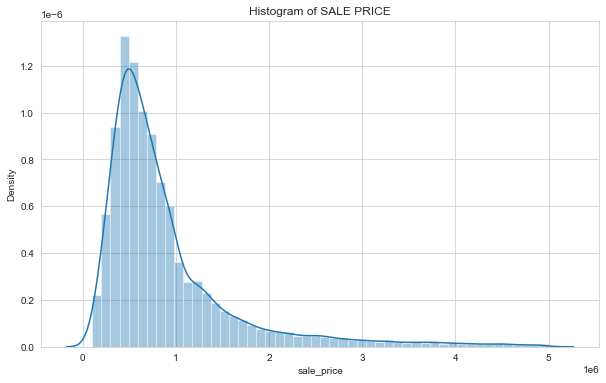

In [301]:
#SALE PRICE looks before the transformation...
plt.figure(figsize=(10,6))
sns.distplot(df1['sale_price'])
plt.title('Histogram of SALE PRICE')
plt.show()

In [302]:
# Take the log and normalise
from sklearn.preprocessing import StandardScaler
log_sale=np.log(df1['sale_price']).values.reshape(1, -1)
df1['sale_price'] = StandardScaler().fit_transform(np.log(df1['sale_price']).values.reshape(-1,1))


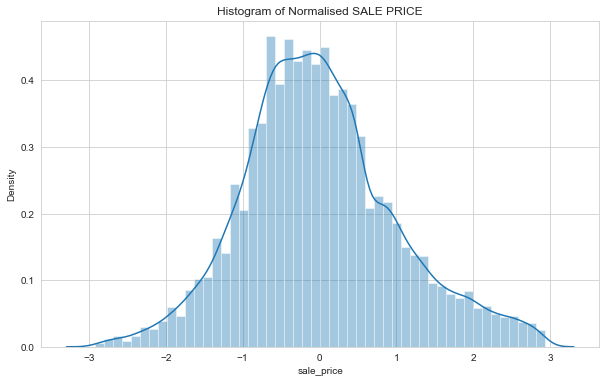

In [303]:
# aFTER TRANSFORMATION
plt.figure(figsize=(10,6))
sns.distplot(df1['sale_price'])
plt.title('Histogram of Normalised SALE PRICE')
plt.show()

#### Transforming the independent variables

Some of the variables contain zeroes, which is why I need to add 1 so that I can take the log before normalising it - you can see that in the table below. Using the log allows me to get rid of the skew in the data and have a more normal distribution. The reason why I need to add 1 is because I can't take the log of 0 - it is not defined. The log of 1 however is.

In [304]:
df1.describe()

,neighborhood,building_class_category,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
count,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,3.485900e+04,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000
mean,120.373160,3.522591,1.549844,0.122866,1.672710,2734.058842,2191.018575,1953.176568,-3.006415e-15,63.823432,0.090852,0.303652,0.122063,0.340572,0.142861
std,73.097829,4.582779,1.040272,12.113960,12.150276,1362.383230,1300.536399,37.420392,1.000014e+00,37.420392,0.287402,0.459841,0.327363,0.473908,0.349936
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1845.000000,-2.921172e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.000000,1.000000,0.000000,1.000000,1967.000000,1294.000000,1925.000000,-6.579979e-01,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,112.000000,1.000000,1.000000,0.000000,1.000000,2518.000000,1936.000000,1944.000000,-7.728455e-02,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,186.500000,10.000000,2.000000,0.000000,2.000000,3854.481179,3319.500000,1988.000000,5.221818e-01,92.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,245.000000,28.000000,16.000000,2261.000000,2261.000000,6709.000000,7740.000000,2017.000000,2.937902e+00,172.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### UNITS

In [305]:
# Add 1 to Units
df1['commercial_units'] = df1['commercial_units'] + 1
df1['residential_units'] = df1['residential_units'] + 1
df1['total_units'] = df1['total_units'] + 1

# Take the log and standardise
df1['commercial_units'] = StandardScaler().fit_transform(np.log(df1['commercial_units']).values.reshape(-1,1))
df1['residential_units'] = StandardScaler().fit_transform(np.log(df1['residential_units']).values.reshape(-1,1))
df1['total_units'] = StandardScaler().fit_transform(np.log(df1['total_units']).values.reshape(-1,1))

#### SQUARE FEET

In [306]:
# Add 1 to Units
df1['gross_square_feet'] = df1['gross_square_feet'] + 1
df1['land_square_feet'] = df1['land_square_feet'] + 1

# Take the log and standardise
df1['gross_square_feet'] = StandardScaler().fit_transform(np.log(df1['gross_square_feet']).values.reshape(-1,1))
df1['land_square_feet'] = StandardScaler().fit_transform(np.log(df1['land_square_feet']).values.reshape(-1,1))

#### AGE

In [307]:
# Add 1 to BUILDING AGE
df1['age'] = df1['age'] + 1

# Take the log and standardise
df1['age'] = StandardScaler().fit_transform(np.log(df1['age']).values.reshape(-1,1))

In [308]:
df1.describe()

,neighborhood,building_class_category,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
count,34859.000000,34859.000000,3.485900e+04,3.485900e+04,3.485900e+04,3.485900e+04,3.485900e+04,34859.000000,3.485900e+04,3.485900e+04,34859.000000,34859.000000,34859.000000,34859.000000,34859.000000
mean,120.373160,3.522591,9.207344e-16,2.336684e-14,2.782156e-14,-6.761599e-16,2.225414e-15,1953.176568,-3.006415e-15,-1.708315e-15,0.090852,0.303652,0.122063,0.340572,0.142861
std,73.097829,4.582779,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,37.420392,1.000014e+00,1.000014e+00,0.287402,0.459841,0.327363,0.473908,0.349936
min,0.000000,0.000000,-2.824222e+00,-2.000895e-01,-6.800844e-01,-3.178906e+00,-3.129462e+00,1845.000000,-2.921172e+00,-3.519023e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.000000,-6.003612e-01,-2.000895e-01,-6.800844e-01,1.532897e-01,8.065188e-02,1925.000000,-6.579979e-01,-3.753545e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,112.000000,1.000000,-6.003612e-01,-2.000895e-01,-6.800844e-01,2.617350e-01,2.610090e-01,1944.000000,-7.728455e-02,4.591508e-01,0.000000,0.000000,0.000000,0.000000,0.000000
75%,186.500000,10.000000,7.005143e-01,-2.000895e-01,6.349893e-01,4.487274e-01,5.024417e-01,1988.000000,5.221818e-01,6.703812e-01,0.000000,1.000000,0.000000,1.000000,0.000000
max,245.000000,28.000000,6.265728e+00,4.334660e+01,2.212359e+01,6.921599e-01,8.815917e-01,2017.000000,2.937902e+00,1.244076e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
df1

,neighborhood,building_class_category,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
3,1,6,4.869074,-0.200089,4.849046,0.216589,0.823204,1913,2.579894,0.782553,0,0,1,0,0
6,1,6,4.225251,-0.200089,4.198196,0.101963,0.610566,1920,2.265778,0.718784,0,0,1,0,0
79,1,10,-0.600361,-0.200089,-0.680084,0.448727,0.573972,1920,0.117116,0.718784,0,0,1,0,0
80,1,10,-0.600361,-0.200089,-0.680084,0.448727,0.573972,1920,0.137018,0.718784,0,0,1,0,0
81,1,10,-0.600361,-0.200089,-0.680084,0.448727,0.573972,1920,0.575133,0.718784,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84537,243,1,0.700514,-0.200089,0.634989,0.501846,0.432580,1996,-0.181617,-0.662025,0,0,0,0,1
84540,243,1,0.700514,-0.200089,0.634989,0.383828,0.082723,1995,-0.489702,-0.620939,0,0,0,0,1
84543,243,1,0.700514,-0.200089,0.634989,0.240658,0.388718,1998,-0.674580,-0.750119,0,0,0,0,1
84544,243,1,0.700514,-0.200089,0.634989,0.258233,0.352892,1998,-0.373448,-0.750119,0,0,0,0,1


#### Overview of phase two tasks and comprehensions:
* Thorough EDA was carried out in phase 1. Based on this, data was analysed for presence of missing values.
* Missing values were treated out with proper techniques to cleanse the data.
* It was also noticed that certain features had inherent characteristics like the Commercial locality which contributed to higher unit sales price of the properties. This in turn contributes to highly impacting outliers on the target variable.
* Outlier treatment was carried out on all the impacting variables.
* Furthermore, steps like Feature Engineering, Label Encoding and Scaling were employed to fit the data properly for ML Modelling, aiming towards building an efficient basic Regression Model.

### 7.Train_Test Split

In [310]:
from sklearn.model_selection import train_test_split

x = df1.drop('sale_price', axis = 1)
y = df1['sale_price']
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size =0.2,random_state=42)

In [311]:
x.shape

(34859, 14)

In [312]:
y.shape

(34859,)

In [313]:
# shape of training set
x_train.shape , y_train.shape

((27887, 14), (27887,))

In [314]:
# shape of testing set
x_test.shape , y_test.shape

((6972, 14), (6972,))

### 8. Model Training and Prediction

#### 8.1 Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [125]:
#checking score, or accuracy of the model
model.score(x_test, y_test)

0.37957108214948587

In [317]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [127]:
print("r2", model.score(x_test, y_test))
print("rmse", (mean_squared_error(y_test, y_pred)) **0.5)

r2 0.37957108214948587
rmse 0.7812804392680641


In [128]:
#RMSE for linear regression
np.sqrt(mean_squared_error(y_test,y_pred))

0.7812804392680641

#### 8.2 Decision Tree Regressor

In [129]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train) 
y_pred1 = dt.predict(x_test)

In [130]:
print("r2", dt.score(x_test, y_test))
print("rmse", (mean_squared_error(y_test, y_pred1)) **0.5)

r2 0.42881654204104147
rmse 0.7496330850280022


In [131]:
np.sqrt(mean_squared_error(y_test,y_pred1))

0.7496330850280022

#### 8.3 Random Forest Regressor

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
y_pred2 = rf.predict(x_test)

In [133]:
print("r2", rf.score(x_test, y_test))
print("rmse", (mean_squared_error(y_test, y_pred2)) **0.5)

r2 0.6388656271646749
rmse 0.5960673703238072


In [134]:
np.sqrt(mean_squared_error(y_test,y_pred2))

0.5960673703238072

#### 8.4 SVM Regression

In [135]:
from sklearn.svm import SVR

In [136]:
sv = SVR(kernel = 'rbf')
sv.fit(x_train,y_train)

SVR()

In [137]:
y_pred3 = sv.predict(x_test)

In [138]:
print("r2", sv.score(x_test, y_test))
print("rmse", (mean_squared_error(y_test, y_pred3)) **0.5)

r2 0.05464242686327003
rmse 0.96440396892553


#### 8.5 XGBoost Regressor

In [139]:
import xgboost as xgb

In [140]:
xgbm =xgb.XGBRegressor(base_score=0.4, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colXsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=4000, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
xgbm.fit(x_train, y_train) 

XGBRegressor(base_score=0.4, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=4000, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [142]:
y_pred_xgb = xgbm.predict(x_test)

In [143]:
print("r2", xgbm.score(x_test, y_test))
print("rmse", (mean_squared_error(y_test, y_pred_xgb)) **0.5)

r2 0.6589442313979292
rmse 0.5792601267818178


#### 8.6 KNN Regression

In [144]:
from sklearn.neighbors import KNeighborsRegressor

In [145]:
#knn regression
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model1 = KNeighborsRegressor(n_neighbors = K)

    model1.fit(x_train, y_train)  #fit the model
    knnpred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,knnpred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.7812804392680641
RMSE value for k=  2 is: 0.7812804392680641
RMSE value for k=  3 is: 0.7812804392680641
RMSE value for k=  4 is: 0.7812804392680641
RMSE value for k=  5 is: 0.7812804392680641
RMSE value for k=  6 is: 0.7812804392680641
RMSE value for k=  7 is: 0.7812804392680641
RMSE value for k=  8 is: 0.7812804392680641
RMSE value for k=  9 is: 0.7812804392680641
RMSE value for k=  10 is: 0.7812804392680641
RMSE value for k=  11 is: 0.7812804392680641
RMSE value for k=  12 is: 0.7812804392680641
RMSE value for k=  13 is: 0.7812804392680641
RMSE value for k=  14 is: 0.7812804392680641
RMSE value for k=  15 is: 0.7812804392680641
RMSE value for k=  16 is: 0.7812804392680641
RMSE value for k=  17 is: 0.7812804392680641
RMSE value for k=  18 is: 0.7812804392680641
RMSE value for k=  19 is: 0.7812804392680641
RMSE value for k=  20 is: 0.7812804392680641


### 9. Model Fine Tuning (Hyperparameter Tuning)

#### 9.1 Linear Regression

In [156]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [157]:
y_pred = model.predict(x_test)

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
# Compute 5-fold cross-validation scores: cv_scores
linreg_cv_score = cross_val_score(model, x_train, y_train, cv=5)

In [160]:
print("R^2: {}".format(model.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(linreg_cv_score)))

print(linreg_cv_score)

R^2: 0.37957108214948587
Root Mean Squared Error: 0.7812804392680641
Average 5-Fold CV Score: 0.37193671428797065
[0.38795775 0.3708982  0.35221101 0.37955762 0.369059  ]


In [168]:
#lasso regression
from sklearn.linear_model import Lasso

In [169]:
alpha=0.0100
lasso_reg = Lasso(alpha=alpha,max_iter=50000)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.01, max_iter=50000)

In [170]:
ypred_lasso = lasso_reg.predict(x_test)

In [171]:
mean_squared_error(y_test,ypred_lasso)

0.6176294231430002

In [172]:
#RMSE for linear regression
np.sqrt(mean_squared_error(y_test,ypred_lasso))

0.7858940279344284

In [173]:
# Perform 5-fold cross-validation: lasso_cv
lasso_cv = cross_val_score(lasso_reg, x_train, y_train, cv=5)

In [174]:
print("Average 5-Fold CV Score: {}".format(np.mean(lasso_cv)))

print(lasso_cv)

Average 5-Fold CV Score: 0.36777815885690723
[0.38050481 0.3657818  0.35911261 0.37210257 0.361389  ]


In [175]:
#ridge regression
from sklearn.linear_model import Ridge

In [176]:
ridge_reg = Ridge(alpha=0.001, normalize=True)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.001, normalize=True)

In [177]:
y_pred_ridge = ridge_reg.predict(x_test)

In [178]:
mean_squared_error(y_test,y_pred_ridge)

0.6105414407939875

In [179]:
#RMSE for linear regression
np.sqrt(mean_squared_error(y_test,y_pred_ridge))

0.7813715126583433

In [180]:
# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge_reg, x_train, y_train, cv=5)

In [181]:
print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv)))

print(ridge_cv)

Average 5-Fold CV Score: 0.3720941003363946
[0.38782934 0.37084027 0.3534393  0.37935367 0.36900792]


#### Elastic Net and GridSearch

In [182]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [183]:
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(x_train, y_train)

# Predict on the test set and compute metrics
y_pred_elas = gm_cv.predict(x_test)
r2 = gm_cv.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred_elas)

In [184]:
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.22065355433725542
Tuned ElasticNet MSE: 0.7667476074186158


#### 9.2  Random Forest

In [178]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [179]:
y_pred2 = rf.predict(x_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf, x_train, y_train, cv=5)

In [180]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

Average 5-Fold CV Score: 0.6398245997989583
[0.65023318 0.62297395 0.63090591 0.64167229 0.65333767]


In [181]:
#hyperparameter tuning
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
#create a base model
rf2 = RandomForestRegressor()

#instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [182]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'max_depth': 100,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [184]:
#retraining the model with tuned parameters 
rf2 = RandomForestRegressor(bootstrap= True,
 max_depth= 110,
 min_samples_leaf= 5,
 min_samples_split= 8,
 n_estimators= 100,random_state=42)

rf2.fit(x_train, y_train)
rf2pred = rf2.predict(x_test)

In [185]:
np.sqrt(mean_squared_error(y_test,rf2pred))

0.5861451555711813

In [186]:
print("R^2: {}".format(rf2.score(x_test, y_test)))

R^2: 0.6507885383432024


#### 9.3 XGBoost Regressor

In [315]:
#XGBoost hyper-parameter tuning
from xgboost import XGBRegressor
def hyperParameterTuning(x_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [80, 90, 100, 110],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 300, 1000],
        'objective': ['reg:squarederror']
    }

    xgbm = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgbm,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(x_train,y_train)
    return gsearch.best_params_

In [318]:
xgbm = XGBRegressor( objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.05,
        max_depth = 110,
        min_child_weight = 5,
        n_estimators = 1000,
        subsample = 0.7)

%time xgbm.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

y_pred_xgb = xgbm.predict(x_test)

mse = np.sqrt(mean_squared_error(y_test,y_pred_xgb))

print("MSE: ", mse)

Wall time: 16.9 s
MSE:  0.572021224936016


In [319]:
print("R^2: {}".format(xgbm.score(x_test, y_test)))

R^2: 0.667415184700632


#### Overview of Modeling & Finetuning tasks and comprehensions:
* Data was pre-processed and finally 14 features where used for the modeling including the target variable.
* Train_Test split was done and the data was input to models for fitting and transforming.
* Algorithms like Linear Regression, KNN Regression, and other regressor models of Decision Tree, Random Forest, SVM, XG Boost, etc. where tried out on the data.
* The models yield not very good R2 score, the best being 0.658 for XGBoost Regressor without finetuning. On finetuning also, the score increase only by a bit to 0.667. 
* GridSearchCV where carried out for models. 
* For Linear Regression, hyperparameter tuning was done with Lasso and Ridge which didn't give any desirable output. 



In [323]:
test = pd.DataFrame({'Predicted Data': y_pred_xgb, 'Test Data' : y_test})
test.sample(10)

,Predicted Data,Test Data
76382,-1.237237,-1.355273
19690,-0.238497,-0.436262
54803,0.739984,0.463053
14639,1.213839,1.410131
82743,-0.116219,0.150835
48705,1.717444,1.852986
72254,-0.488052,-0.466300
73566,-0.726816,-1.386564
32371,-0.769793,-1.117440
28616,-0.929424,-1.108508


#### 10. Web Hosting (Deployment)

In [320]:
#pickling the model (random forest without tuning as there is not much difference)
import pickle 

In [ ]:
with open('rf_model.pkl', 'wb') as f: #'wb' instead 'w' for binary file
    pickle.dump(rf_reg, f) #dumping data to f

* Now, we can use this model_rf.pkl file while deploying our Price Predictor in pythonanywhere.com
* The model is hosted at http://sujithn.pythonanywhere.com/